<a href="https://colab.research.google.com/github/titopucp2024/online-shoppers-purchasing-intention/blob/main/Online_Shoppers_Purchasing_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cargamos el dataframe desde la url proporcionada
!pip3 install -U ucimlrepo

# Instalar MLflow
!pip install mlflow

# EXPLORACIÓN DE LA DATA
##### Laure Schlesinger
##### Hector Calla
##### Gabriel Espinosa

In [14]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=1f0PvDRPQt25OIFwMBjFz-1Otf8poyiG3'
df = pd.read_csv(url)

#drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/ProyectoML/online_shoppers_intention.csv'  # Modify this path as needed
#df = pd.read_csv(file_path)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


| **Variable**                | **Tipo**    | **Descripción**                                                                                                                                                    |
|-----------------------------|-------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Administrative              | Numérica    | Número de páginas de administración visitadas por el usuario.                                                                                                      |
| Administrative_Duration     | Numérica    | Duración total en segundos que el usuario ha pasado en las páginas de administración.                                                                              |
| Informational               | Numérica    | Número de páginas informativas visitadas por el usuario.                                                                                                           |
| Informational_Duration      | Numérica    | Duración total en segundos que el usuario ha pasado en las páginas informativas.                                                                                   |
| ProductRelated              | Numérica    | Número de páginas relacionadas con productos visitadas por el usuario.                                                                                             |
| ProductRelated_Duration     | Numérica    | Duración total en segundos que el usuario ha pasado en las páginas relacionadas con productos.                                                                     |
| BounceRates                 | Numérica    | Tasa de rebote de la sesión.                                                                                                                                       |
| ExitRates                   | Numérica    | Tasa de salida de la sesión.                                                                                                                                       |
| PageValues                  | Numérica    | Valor de la página.                                                                                                                                                |
| SpecialDay                  | Numérica    | Importancia del día para las compras especiales (valor entre 0 y 1).                                                                                               |
| Month                       | Categórica  | Mes del año en que la visita ocurrió (Ejemplos: 'Jan', 'Feb', 'Mar', etc.).                                                                                        |
| OperatingSystems            | Categórica  | Sistema operativo del visitante (Ejemplos: 1 para Windows, 2 para Linux, etc.).                                                                                    |
| Browser                     | Categórica  | Navegador del visitante (Ejemplos: 1 para Chrome, 2 para Firefox, etc.).                                                                                           |
| Region                      | Categórica  | Región del visitante (Ejemplos: 1 para América del Norte, 2 para Europa, etc.).                                                                                    |
| TrafficType                 | Categórica  | Tipo de tráfico de la visita (Ejemplos: 1 para tráfico directo, 2 para tráfico de referencia, etc.).                                                               |
| VisitorType                 | Categórica  | Tipo de visitante (nuevo o recurrente) (Ejemplos: 'Returning_Visitor', 'New_Visitor').                                                                             |
| Weekend                     | Booleana    | Indica si la visita ocurrió durante el fin de semana (True o False).                                                                                               |
| Revenue                     | Booleana    | Indica si el visitante completó una transacción (True o False).                                                                                                    |


## Variable Objetivo

Revenue
False    10422
True      1908
Name: count, dtype: int64


<ipython-input-15-3741f5269f5a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(x=cuentas_ingresos.index, y=cuentas_ingresos.values, palette='coolwarm')


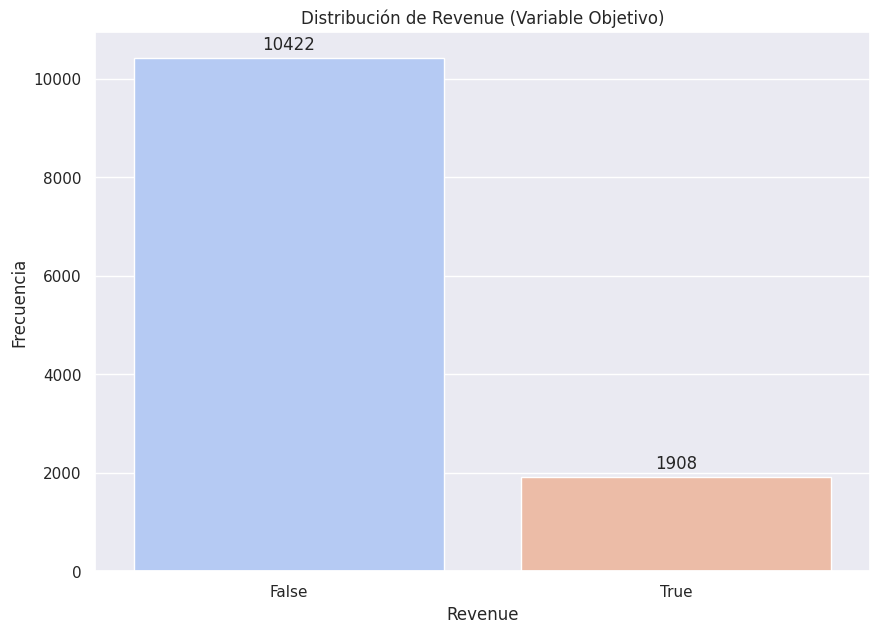

In [15]:
# Contar los valores de la columna 'Revenue'
cuentas_ingresos = df['Revenue'].value_counts()
print(cuentas_ingresos)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 7))
grafico = sns.barplot(x=cuentas_ingresos.index, y=cuentas_ingresos.values, palette='coolwarm')
plt.title('Distribución de Revenue (Variable Objetivo)')
plt.xlabel('Revenue')
plt.ylabel('Frecuencia')
for barra in grafico.patches:
    grafico.annotate(format(barra.get_height(), '.0f'),
                     (barra.get_x() + barra.get_width() / 2., barra.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
plt.show()

## Fin de Semana (Weekend)

<ipython-input-16-bf368a3f2136>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weekend', palette='colorblind')


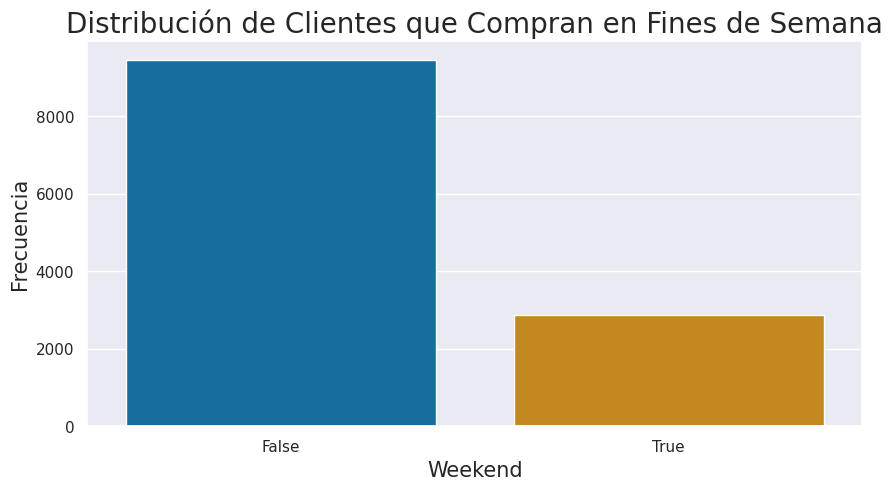

In [16]:
# Configurar el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 5)

# Crear el gráfico de barras con un estilo más ligero
plt.figure()
sns.countplot(data=df, x='Weekend', palette='colorblind')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Clientes que Compran en Fines de Semana', fontsize=20)
plt.xlabel('Weekend', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

# Mostrar el gráfico
plt.show()

# Navegador (Browse)

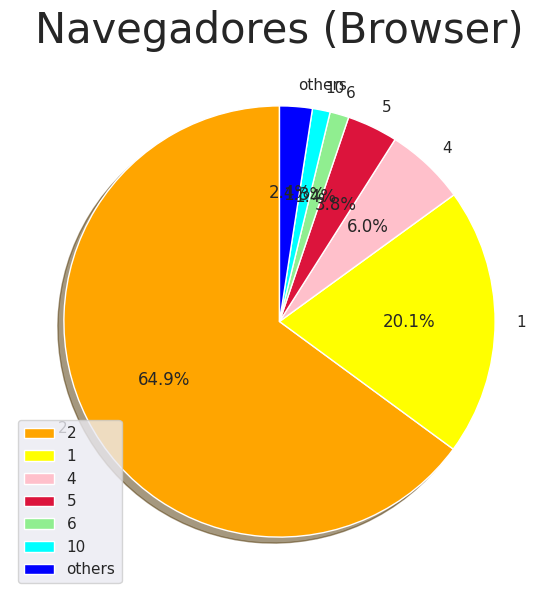

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1", "4", "5", "6", "10", "others"


plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.1f%%', startangle = 90)
plt.title('Navegadores (Browser)', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

## Mes

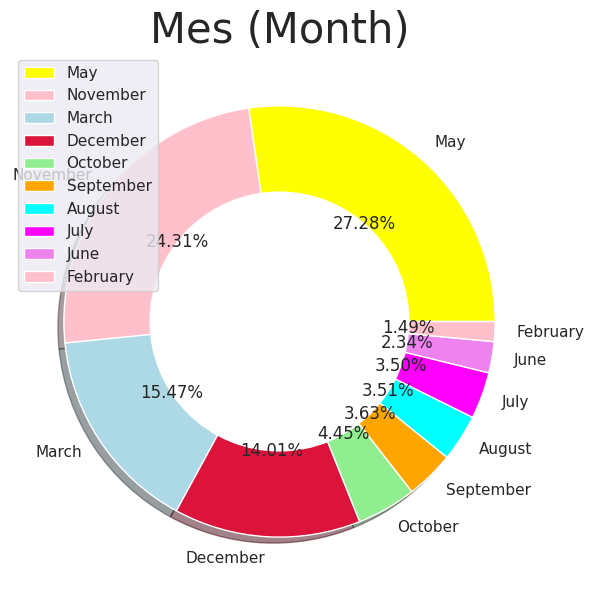

In [18]:
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Mes (Month)', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

Hay dos meses faltantes

## Tipo de visitante

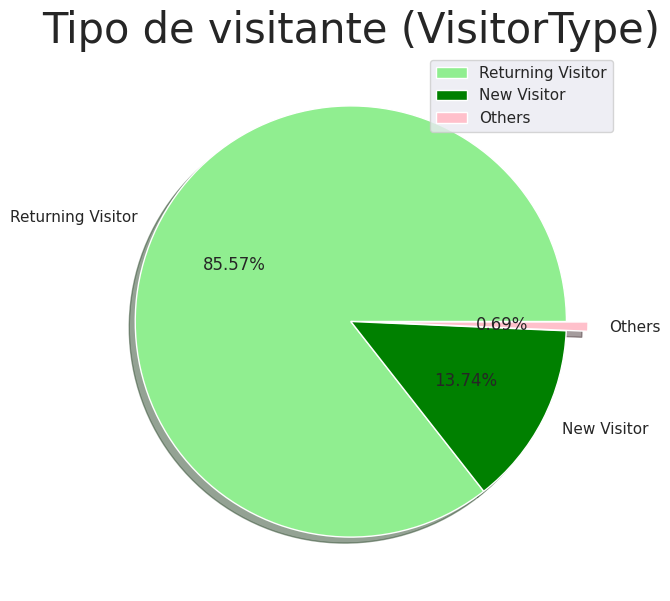

In [19]:
plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tipo de visitante (VisitorType)', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Más del 85% de visitantes son aquellos que regresan a la página

## Tipo de tráfico

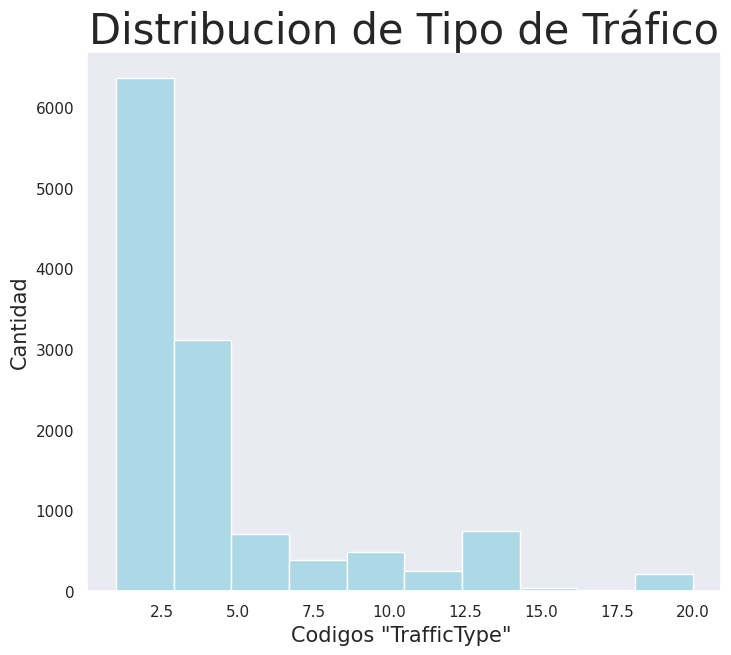

In [20]:
# visualizing the distribution of different traffic around the TrafficType
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['TrafficType'], color = 'lightblue')
plt.title('Distribucion de Tipo de Tráfico', fontsize = 30)
plt.xlabel('Codigos "TrafficType" ', fontsize = 15)
plt.ylabel('Cantidad', fontsize = 15)
plt.grid()
plt.show()

Se ve una distribución exponencial: no es gaussiana

## Region

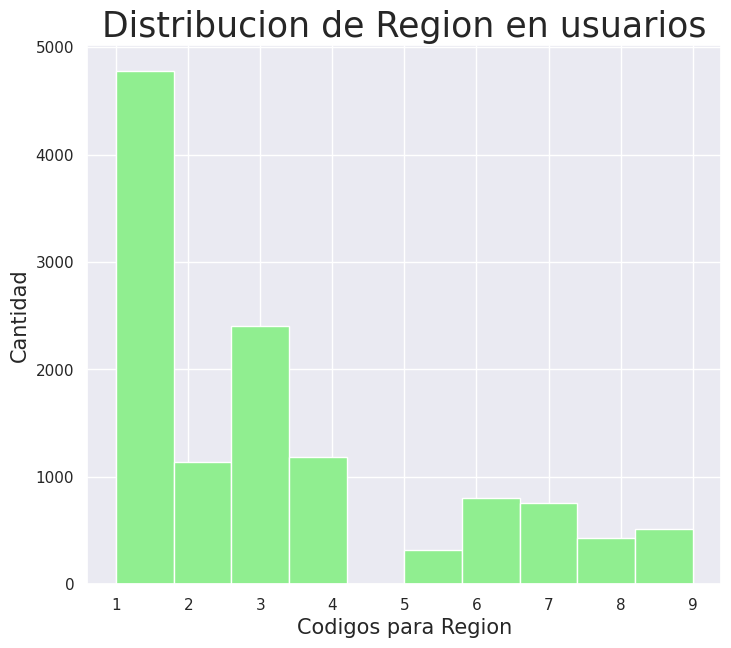

In [21]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['Region'], color = 'lightgreen')
plt.title('Distribucion de Region en usuarios', fontsize = 25)
plt.xlabel('Codigos para Region', fontsize = 15)
plt.ylabel('Cantidad', fontsize = 15)

plt.show()

Esta distribuido de una manera exponencial

# Analisis de comparar varias variables

# Administrativo vs Revenue

<ipython-input-22-6abdf57bc345>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Administrative_Duration', y='Revenue', data=df, palette='pastel', orient='h')


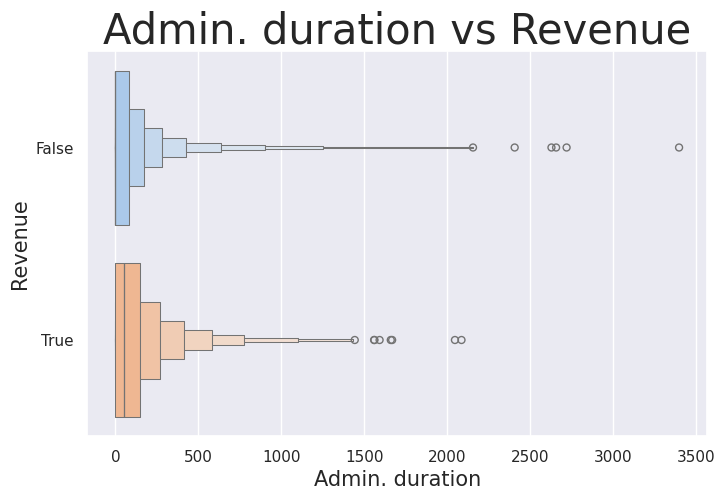

In [22]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x='Administrative_Duration', y='Revenue', data=df, palette='pastel', orient='h')
plt.title('Admin. duration vs Revenue', fontsize=30)
plt.xlabel('Admin. duration', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

Podemos observar que la variable Administrative_Duration tiene una distribución exponencial tanto para las compras realizadas (True) como para las no realizadas (False). También notamos que hay muchos valores atípicos en las no compras (False) según Administrative_Duration.

## Informativo vs Revenue

<ipython-input-23-99c60c1f887f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Informational_Duration', y='Revenue', data=df, palette='rainbow', orient='h')


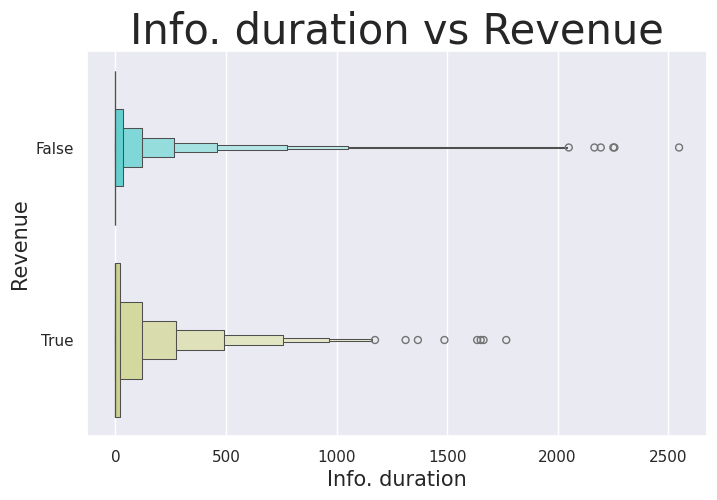

In [23]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x='Informational_Duration', y='Revenue', data=df, palette='rainbow', orient='h')
plt.title('Info. duration vs Revenue', fontsize=30)
plt.xlabel('Info. duration', fontsize=15)
plt.ylabel('Revenue', fontsize=15)

plt.show()

Podemos observar que la variable Informational_Duration tiene una distribución exponencial tanto para las compras realizadas (True) como para las no realizadas (False). También notamos que hay muchos valores atípicos en las no compras (False) según Informational_Duration.

## Relacionado a producto vs Revenue

<ipython-input-24-83f32f459141>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='ProductRelated_Duration', y='Revenue', data=df, palette='inferno', orient='h')


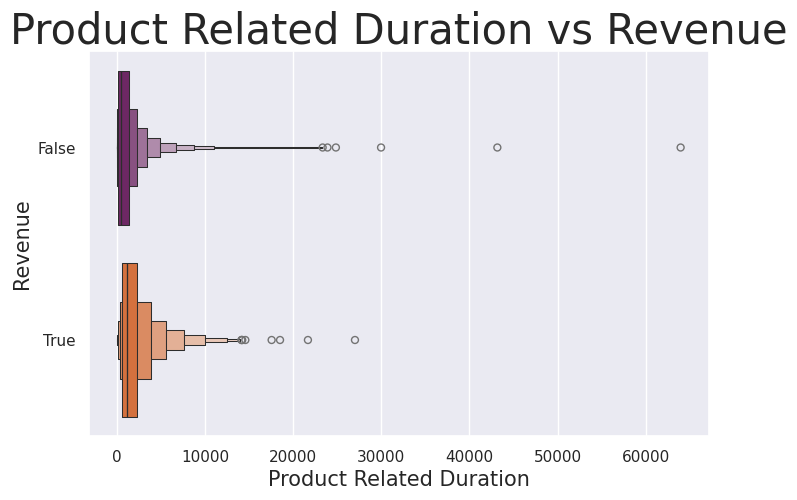

In [24]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x='ProductRelated_Duration', y='Revenue', data=df, palette='inferno', orient='h')
plt.title('Product Related Duration vs Revenue', fontsize=30)
plt.xlabel('Product Related Duration', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

## Exit rates vs Revenue

<ipython-input-25-01808d0f5c88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='ExitRates', y='Revenue', data=df, palette='dark', orient='h')


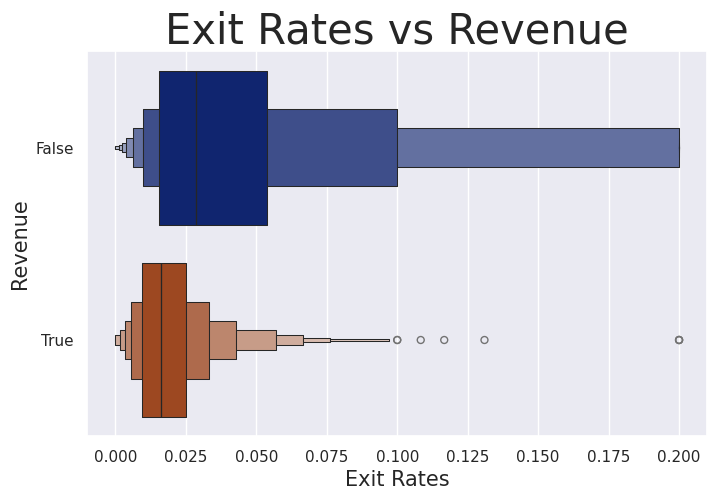

In [25]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x='ExitRates', y='Revenue', data=df, palette='dark', orient='h')
plt.title('Exit Rates vs Revenue', fontsize=30)
plt.xlabel('Exit Rates', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

Tiene una distribución normal (gaussiana) tanto para las compras realizadas (True) como para las no realizadas (False). También notamos que hay muchos valores atípicos en las no compras (False) según ExitRates.

## PageValues vs Revenue

<ipython-input-26-cd56bca7cc1f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='PageValues', y='Revenue', data=df, palette='spring', orient='h')


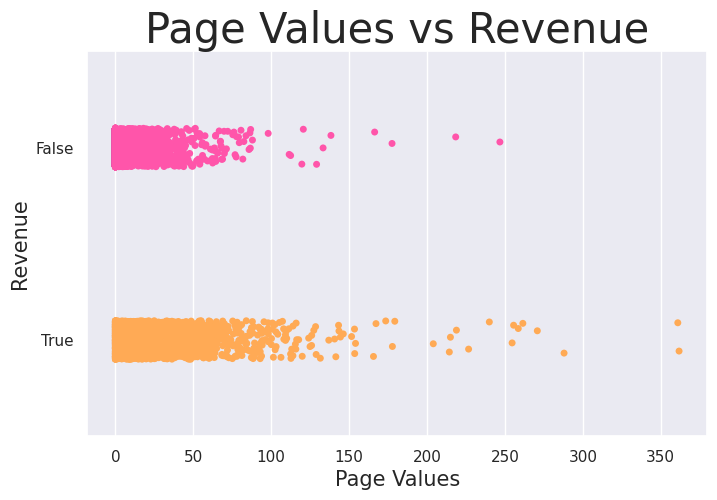

In [26]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(x='PageValues', y='Revenue', data=df, palette='spring', orient='h')
plt.title('Page Values vs Revenue', fontsize=30)
plt.xlabel('Page Values', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

Podemos observar que la variable PageValues tiene una distribución exponencial tanto para las compras realizadas (True) como para las no realizadas (False). También notamos que hay muchos valores atípicos en las compras realizadas (True) según ExitRates. Lo más importante aquí es que PageValues tiene una gran influencia en la decisión de comprar (True) un producto.

## Bounce rates vs Revenue

<ipython-input-27-2d5781e630cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='BounceRates', y='Revenue', data=df, palette='autumn', orient='h')


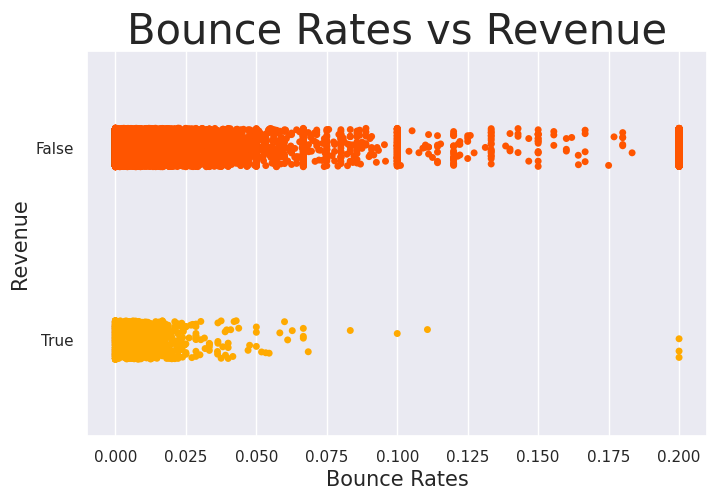

In [27]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(x='BounceRates', y='Revenue', data=df, palette='autumn', orient='h')
plt.title('Bounce Rates vs Revenue', fontsize=30)
plt.xlabel('Bounce Rates', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

Podemos observar que la variable BounceRates tiene una distribución exponencial tanto para las compras realizadas (True) como para las no realizadas (False). También notamos que hay muchos valores atípicos en las no compras (False) según ExitRates. BounceRates tiene una gran influencia en la decisión de comprar un producto o no.

## Weekend y Revenue

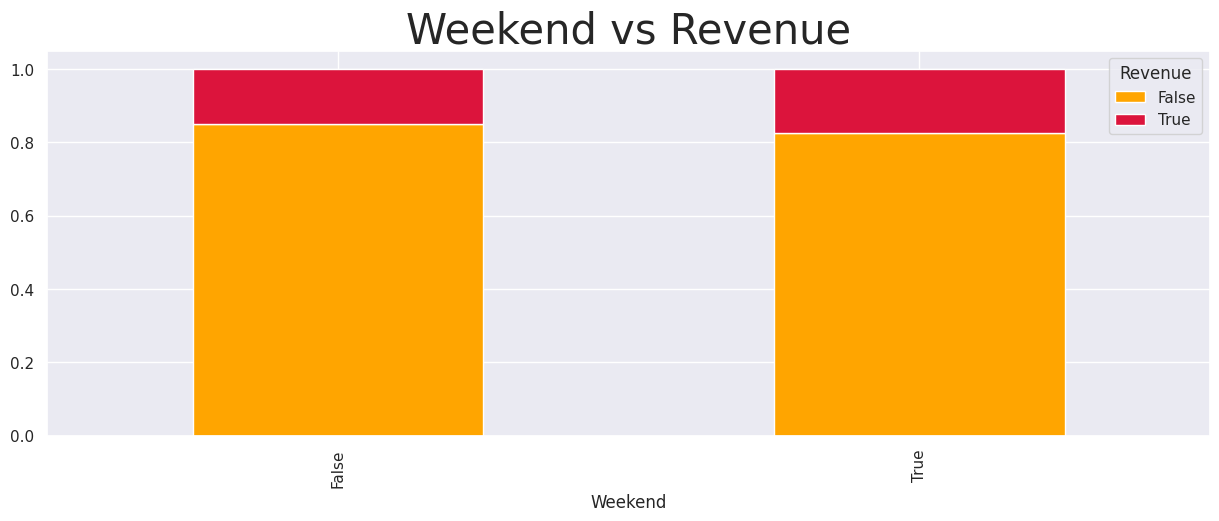

In [28]:
dfW = pd.crosstab(df['Weekend'], df['Revenue'])
dfW.div(dfW.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

No hay nada significativo, se puede ignorar esta variable

# Tipo De tráfico vs Revenue

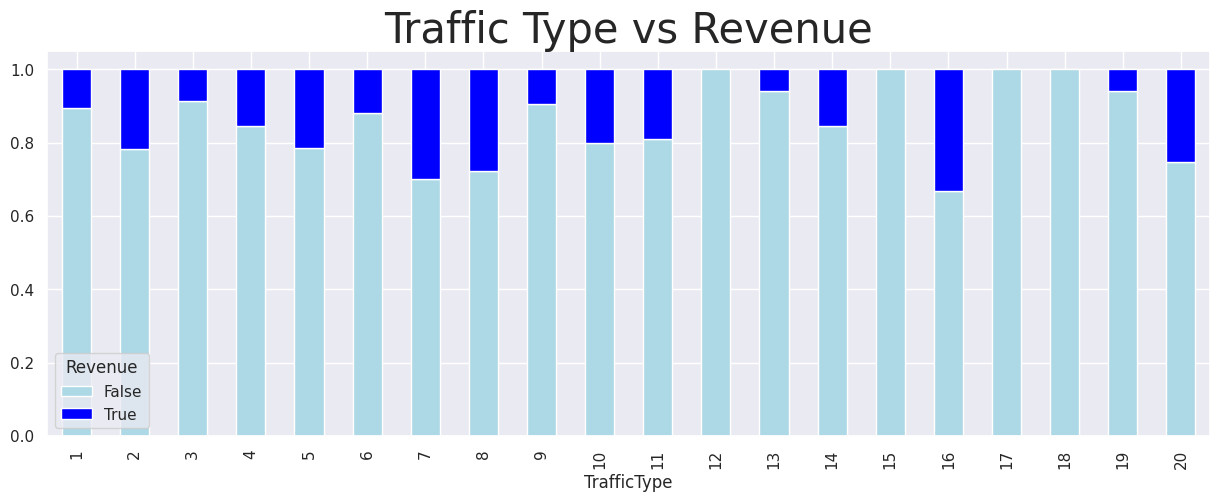

In [29]:
dfT = pd.crosstab(df['TrafficType'], df['Revenue'])
dfT.div(dfT.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

Si es significativo la diferencia del tipo de trafico

## Visitor Type vs Revenue

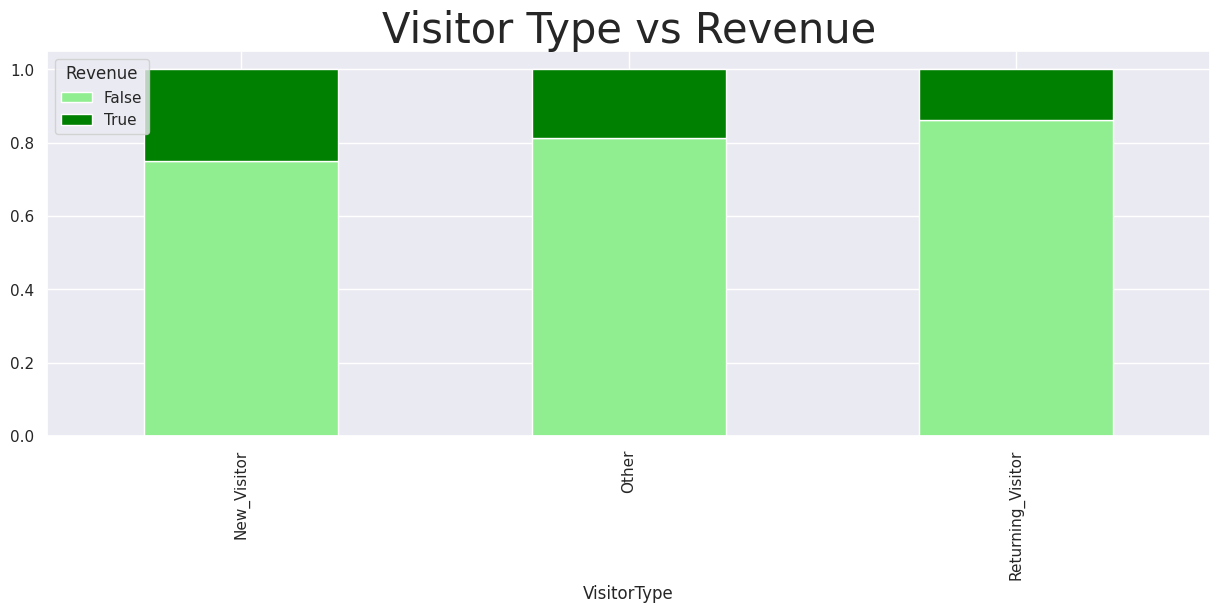

In [30]:
dfV = pd.crosstab(df['VisitorType'], df['Revenue'])
dfV.div(dfV.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize =(15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

Sí es importante

## Region vs Revenue

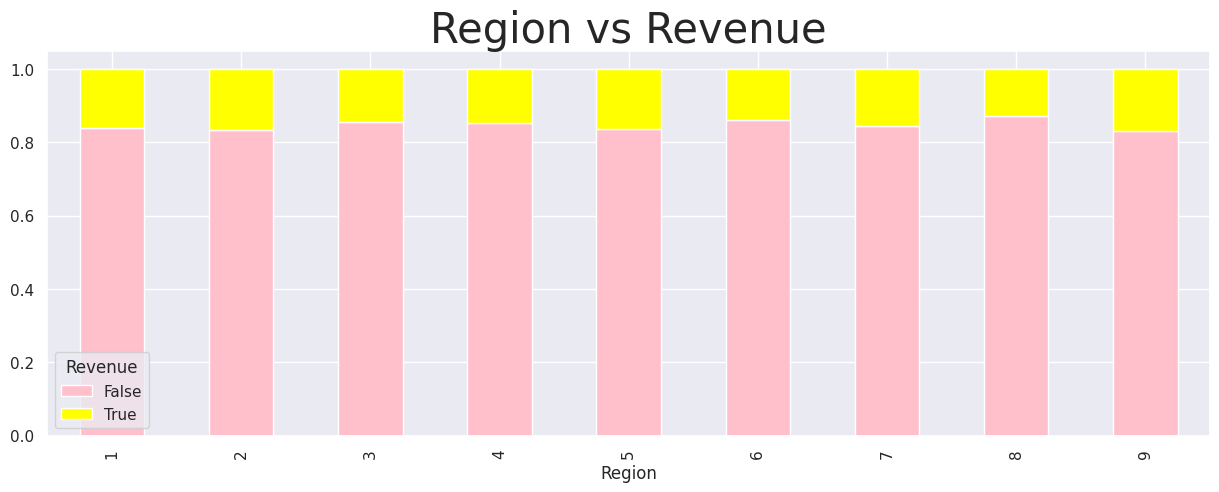

In [31]:
dfR = pd.crosstab(df['Region'], df['Revenue'])
dfR.div(dfR.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['pink', 'yellow'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

Los valores son similares, se puede dejar de lado

# Analisis de Correlacion

<Axes: >

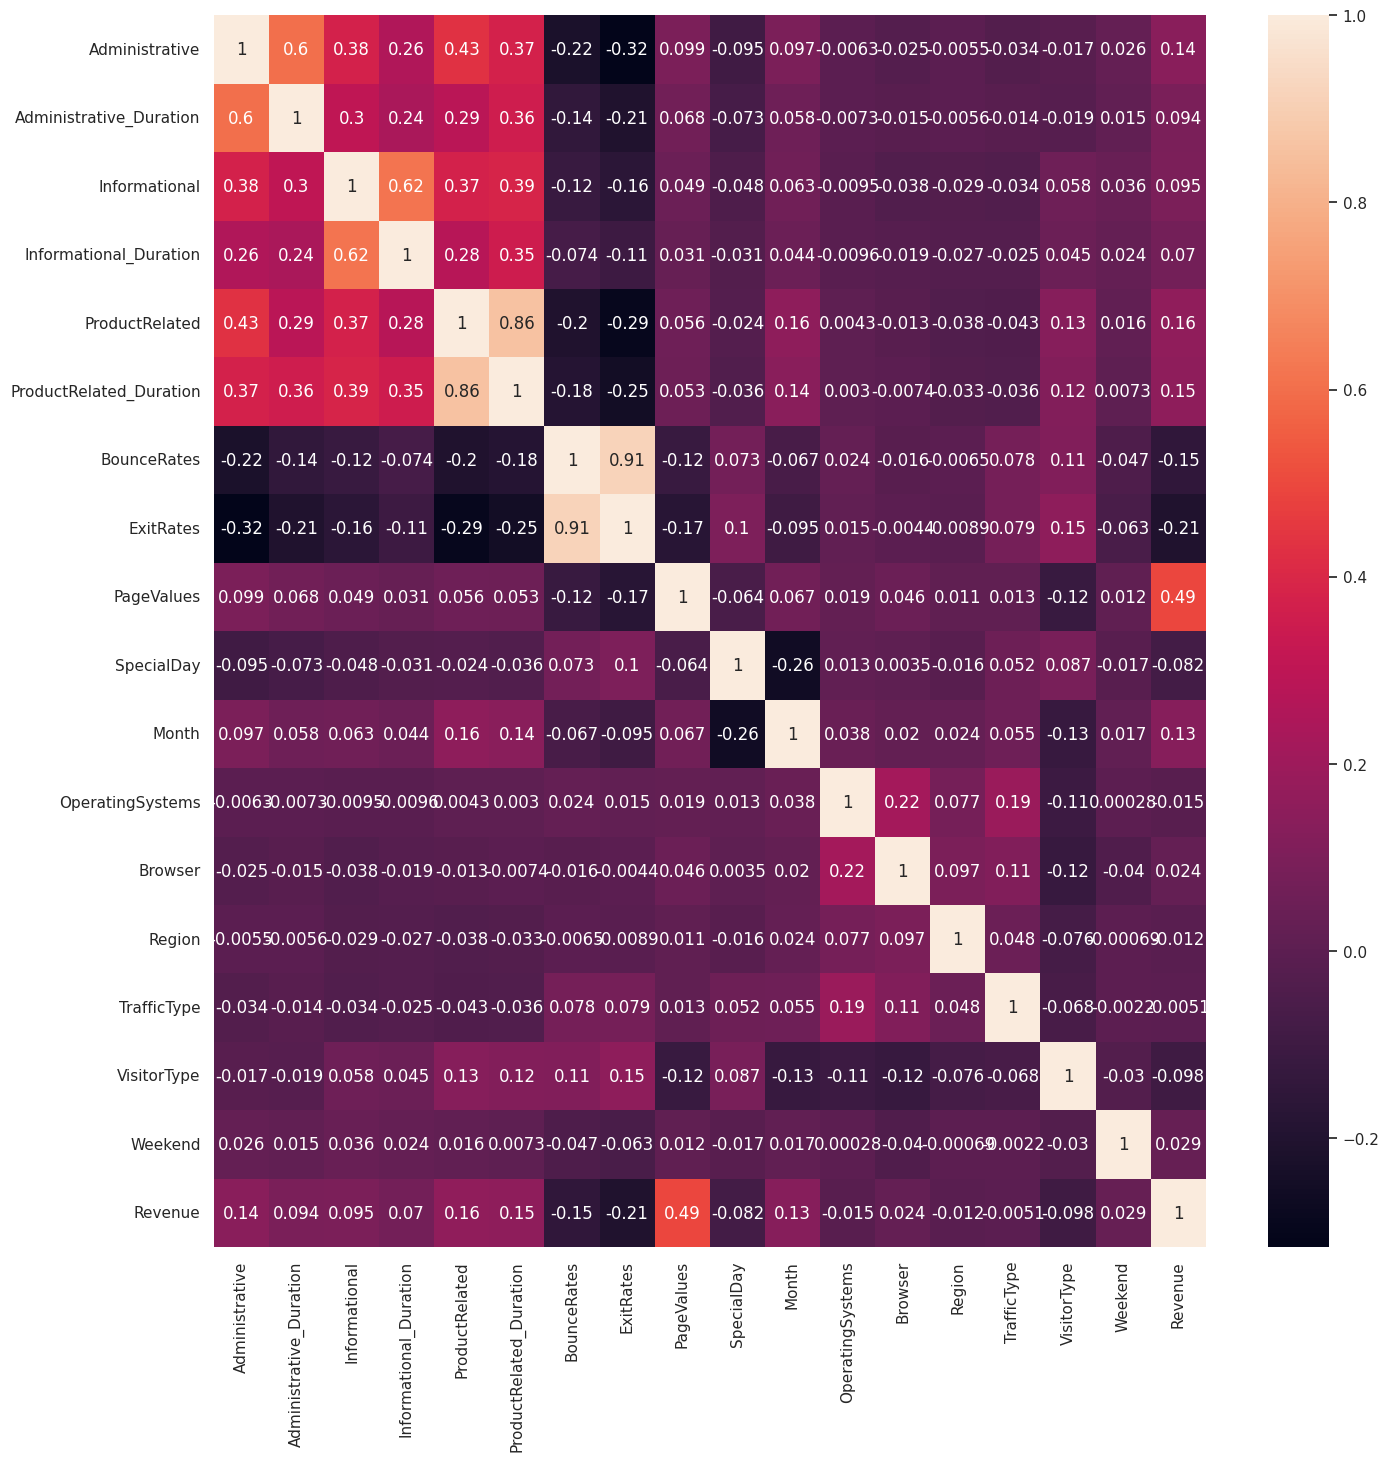

In [32]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Existe una altísima correlación entre BounceRate y ExitRate. Ambas métricas miden algún tipo de abandono del sitio web. La Bounce Rate es un caso especial de la Exit Rate, donde la salida ocurre después de visitar solo una página.
Los visitantes que abandonan el sitio después de una página (BounceRate) contribuyen directamente a la tasa de salida (ExitRate). Si muchas visitas consisten en ver solo una página, ambas métricas serán altas

# Duplicados

In [33]:
duplicados = df[df.duplicated()]

# Opcionalmente, puedes contar el número de filas duplicadas
num_duplicados = duplicados.shape[0]
print(f'Número de filas duplicadas: {num_duplicados}')

Número de filas duplicadas: 125


In [34]:
duplicados = df[df.duplicated(keep=False)]

No hay manera de saber con certeza que estos registros fueron duplicados erróneamente en la adquisición de la data. Se presume que son sesiones diferentes tras la lectura del paper y de interpretaciones de la literatura. No se eliminarán estos registros duplicados

In [ ]:
PROJECT_NAME = "PrediccionCompra"
from pathlib import Path
mlflow_project_path = Path(f"drive/MyDrive/ProyectoML/MLFlow/{PROJECT_NAME}")
mlflow_project_path.mkdir(exist_ok=True)

!touch drive/MyDrive/ProyectoML/MLFlow/{PROJECT_NAME}/output.log
!nohup mlflow server --backend-store-uri drive/MyDrive/ProyectoML/MLFlow/{PROJECT_NAME}/content/mlruns --default-artifact-root drive/MyDrive/ProyectoML/MLFlow/{PROJECT_NAME}/content/mlruns --host 0.0.0.0 --port 5000 > drive/MyDrive/ProyectoML/MLFlow/{PROJECT_NAME}/output.log 2>&1 &

In [ ]:
!pgrep mlflow

1534


In [ ]:
from google.colab import userdata
ngrok_token = userdata.get('ngrok_token')
!pip install pyngrok
!ngrok config add-authtoken {ngrok_token}

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import os
from pyngrok import ngrok

port = "5000"

# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))

 * ngrok tunnel "https://eafd-34-148-147-183.ngrok-free.app" -> "http://127.0.0.1:5000"


In [ ]:
service = "ngrok"
# Find the PID of the ngrok process
pids = !pgrep {service}

# If ngrok is running, kill it
if pids:
  pid = pids[0]  # Assuming you want to kill the first ngrok process if there are multiple
  !kill -9 {pid}
  print(f"{service} killed")
else:
  print(f"{service} is not running.")

ngrok killed


**EXPLORACION DE LOS DATOS**

In [ ]:
#Sakar,C. and Kastro,Yomi. (2018). Online Shoppers Purchasing Intention Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.

import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
#print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
#print(online_shoppers_purchasing_intention_dataset.variables)

In [ ]:
# Combinamos X e y en un solo dataframe
df = pd.concat([X, y], axis=1)

# Mostrar las primeras filas del dataset para tener una vista previa
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Veamos la Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Veamos Datos Estadisticos de los datos
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# Revisemos si el dataset tiene valores nulos
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
# Revisamos si tiene filas duplicadas
df.duplicated().sum()

125

In [ ]:
# Mostramos las filas duplicadas
df[df.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


**LIMPIEZA DE LOS DATOS**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Month'] = le.fit_transform(df['Month'])
df['Weekend'] = le.fit_transform(df['Weekend'])
df['Revenue'] = le.fit_transform(df['Revenue'])

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [ ]:
mat = df.corr()
mat

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.048560,-0.006347,-0.025035,-0.005487,-0.033561,-0.025820,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.029061,-0.007343,-0.015392,-0.005561,-0.014376,-0.023940,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.019743,-0.009527,-0.038235,-0.029169,-0.034491,0.055828,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.005987,-0.009579,-0.019285,-0.027144,-0.024675,0.044677,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.070299,0.004290,-0.013146,-0.038122,-0.043064,0.126656,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.061186,0.002976,-0.007380,-0.033091,-0.036377,0.119329,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.023763,0.023823,-0.015772,-0.006485,0.078286,0.135536,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.039049,0.014567,-0.004442,-0.008907,0.078616,0.179144,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.021780,0.018508,0.045592,0.011315,0.012532,-0.111228,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.079341,0.012652,0.003499,-0.016098,0.052301,0.085557,-0.016767,-0.082305


In [ ]:
# Convertimos valores booleanos en valores numéricos para las columnas 'Weekend' y 'Revenue'
#df.Weekend = df.Weekend * 1
#df.Revenue = df.Revenue * 1

In [ ]:
# Crear variables dummy a partir de las columnas 'Month' y 'VisitorType'
#df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)
#df = df.astype(int)

Sesgo de cada columna:
Administrative                    1.960357
Administrative_Duration           5.621878
Informational                     4.036464
Informational_Duration            7.584039
ProductRelated                    4.341516
ProductRelated_Duration           7.263743
BounceRates                       0.000000
ExitRates                         0.000000
PageValues                        6.450154
SpecialDay                        8.780452
OperatingSystems                  2.066285
Browser                           3.242350
Region                            0.983549
TrafficType                       1.962987
Weekend                           1.265962
Revenue                           1.909509
Month_Dec                         2.074482
Month_Feb                         8.002600
Month_Jul                         5.058083
Month_June                        6.312378
Month_Mar                         1.910367
Month_May                         1.020161
Month_Nov                      

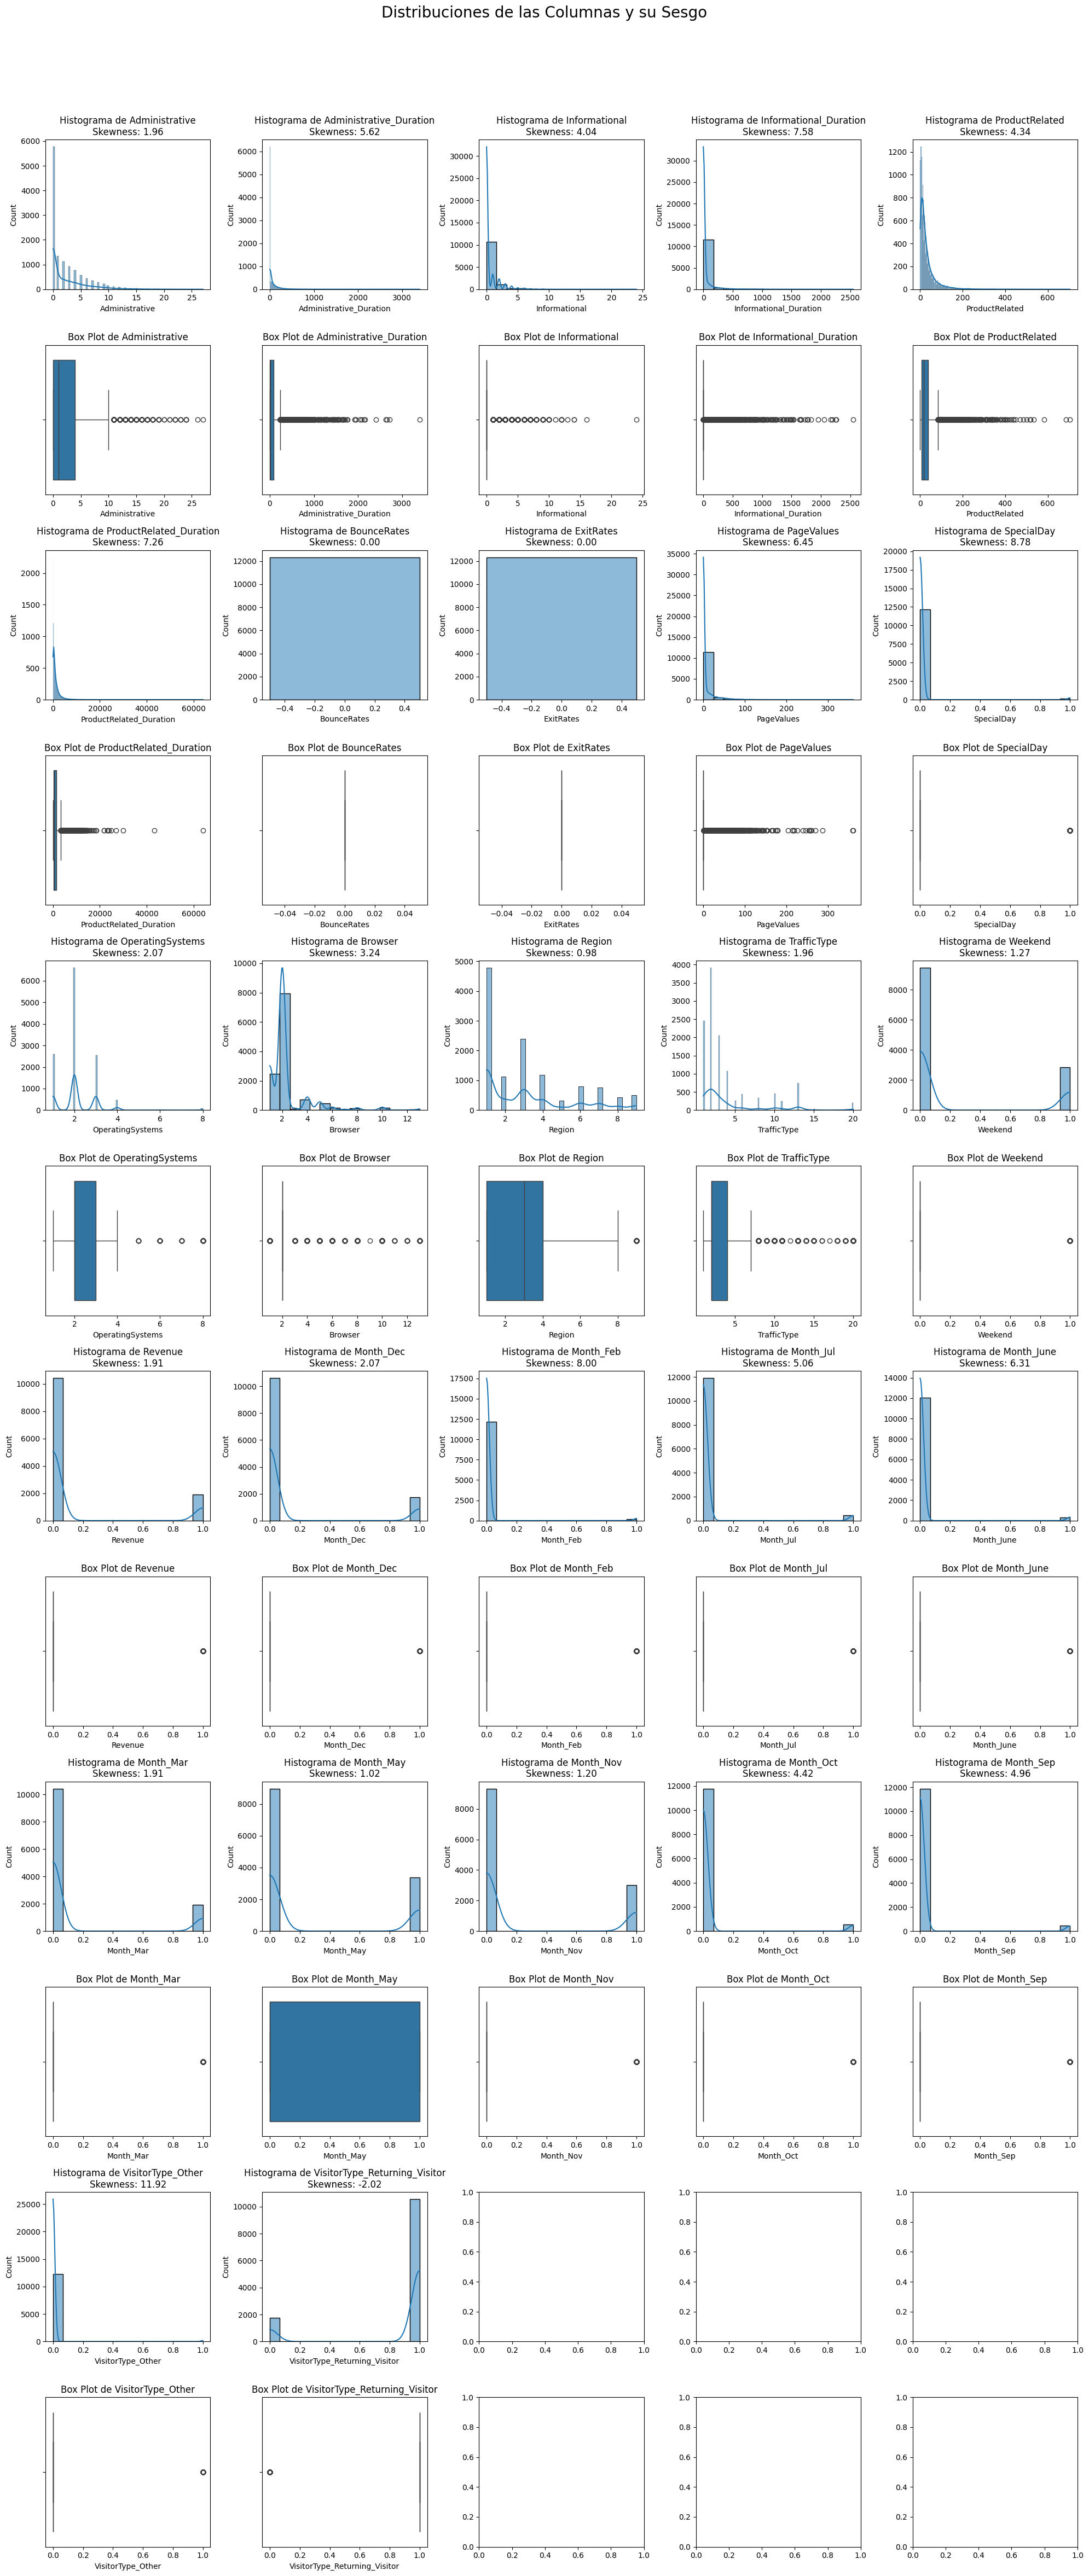

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el sesgo de cada columna
skewness = df.skew()

print("Sesgo de cada columna:")
print(skewness)

# Ajustar el número de filas y columnas para las subplots
n_cols = 5  # Número de columnas en la cuadrícula de subplots
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=n_rows * 2, ncols=n_cols, figsize=(20, 2 * n_rows * 4))

fig.suptitle('Distribuciones de las Columnas y su Sesgo', fontsize=20)

# Graficar histogramas y box plots para visualizar la distribución y el sesgo
for i, col in enumerate(df.columns):
    row = (i // n_cols) * 2
    col_idx = i % n_cols

    # Histograma
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Histograma de {col}\nSkewness: {skewness[col]:.2f}')

    # Box Plot
    sns.boxplot(x=df[col], ax=axes[row + 1, col_idx])
    axes[row + 1, col_idx].set_title(f'Box Plot de {col}')

# Ajustar el diseño para que no se solapen las etiquetas
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Curtosis de cada columna:
Administrative                     4.701146
Administrative_Duration           50.644184
Informational                     26.932266
Informational_Duration            76.401365
ProductRelated                    31.211707
ProductRelated_Duration          137.188511
BounceRates                        0.000000
ExitRates                          0.000000
PageValues                        66.826283
SpecialDay                        75.108524
OperatingSystems                  10.456843
Browser                           12.746733
Region                            -0.148680
TrafficType                        3.479711
Weekend                           -0.397404
Revenue                            1.646493
Month_Dec                          2.303847
Month_Feb                         62.051665
Month_Jul                         23.588026
Month_June                        37.852251
Month_Mar                          1.649769
Month_May                         -0.959428
Month_

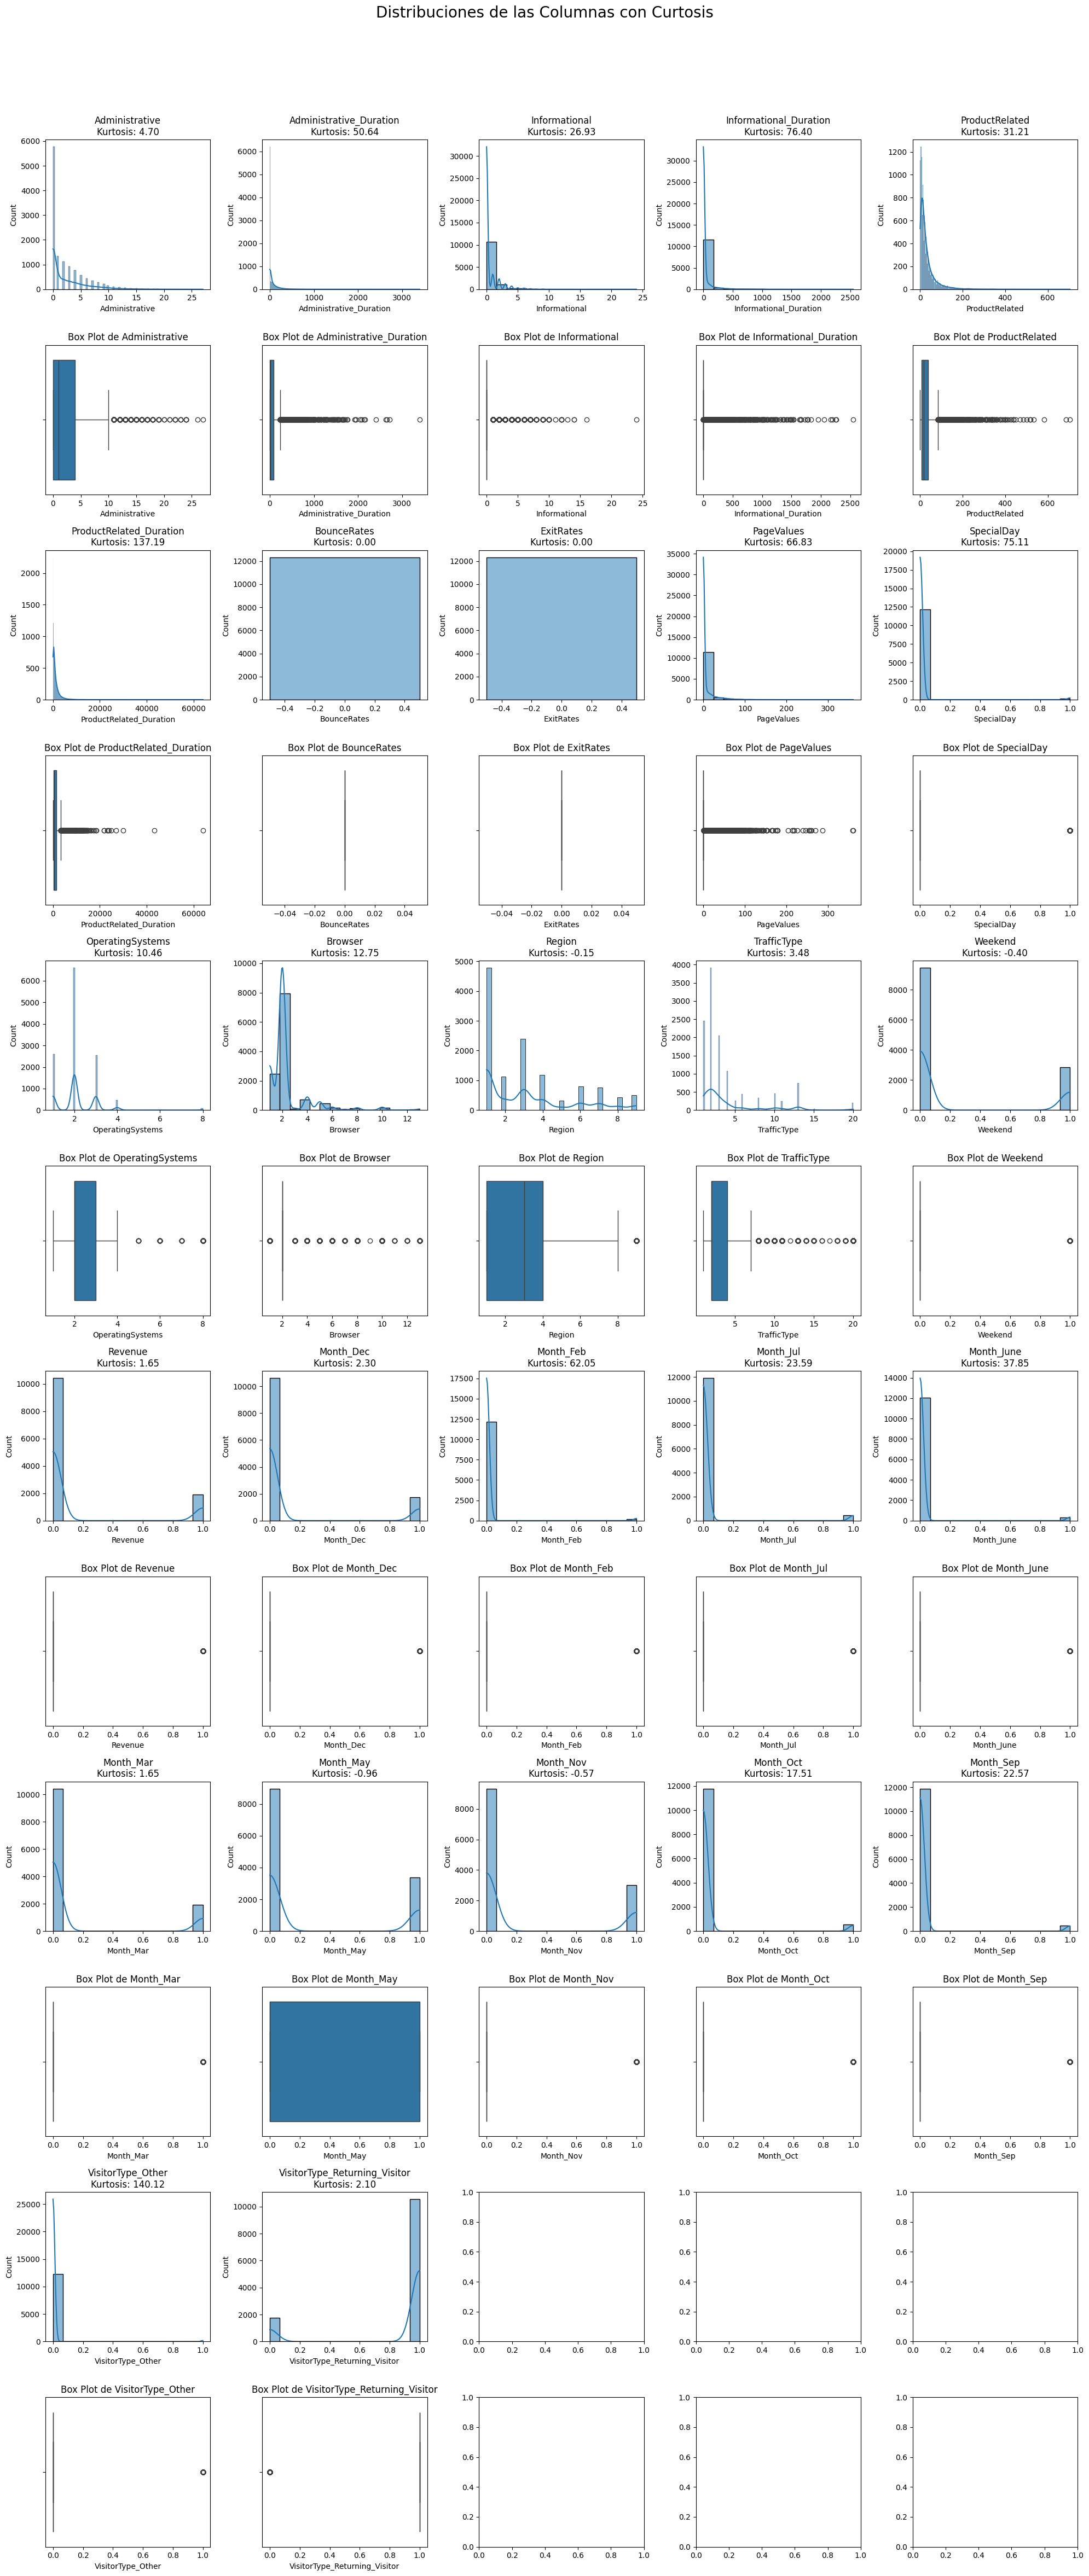

In [ ]:
# Calcular la curtosis de cada columna
kurtosis = df.kurt()

print("Curtosis de cada columna:")
print(kurtosis)

# Ajustar el número de filas y columnas para las subplots
n_cols = 5  # Número de columnas en la cuadrícula de subplots
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=n_rows * 2, ncols=n_cols, figsize=(20, 2 * n_rows * 4))

fig.suptitle('Distribuciones de las Columnas con Curtosis', fontsize=20)

# Graficar histogramas y box plots para visualizar la distribución y la curtosis
for i, col in enumerate(df.columns):
    row = (i // n_cols) * 2
    col_idx = i % n_cols

    # Histograma
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}\nKurtosis: {kurtosis[col]:.2f}')

    # Box Plot
    sns.boxplot(x=df[col], ax=axes[row + 1, col_idx])
    axes[row + 1, col_idx].set_title(f'Box Plot de {col}')

# Ajustar el diseño para que no se solapen las etiquetas
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Columnas numéricas en las que aplicaremos el método IQR
numeric_columns = [
    'Administrative_Duration', 'Informational_Duration',
    'ProductRelated_Duration', 'BounceRates',
    'ExitRates', 'PageValues', 'SpecialDay'
]

# Aplicar el manejo de valores atípicos
#for column in numeric_columns:
#    data_encoded = remove_outliers_iqr(data_encoded, column)

# Normalización de datos numéricos usando MinMaxScaler
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Mostrar las primeras filas del dataset limpio
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,0.001000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,0.000031,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,0.009801,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


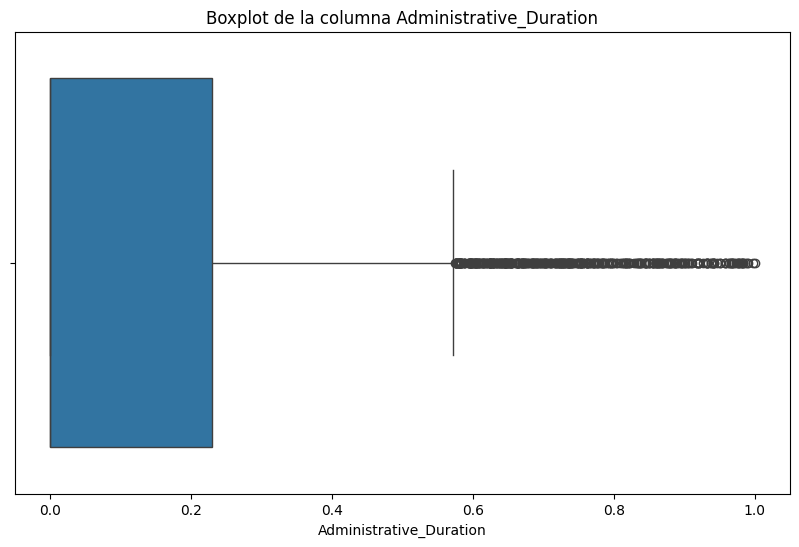

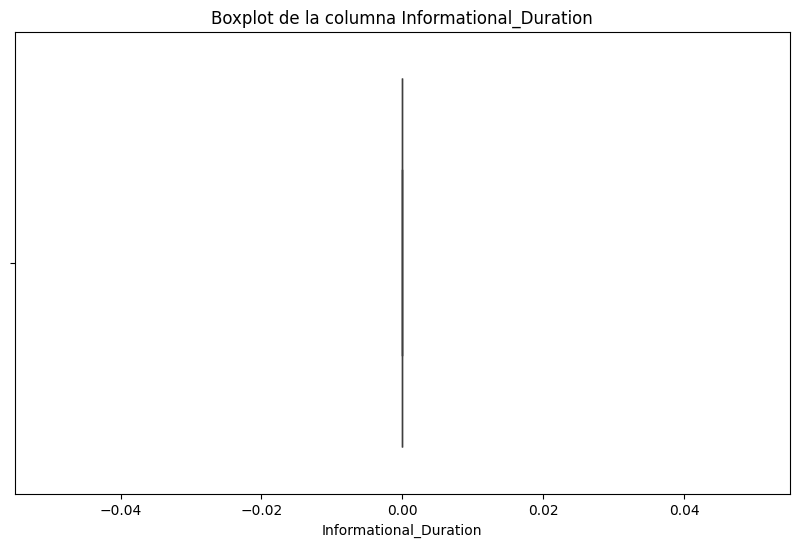

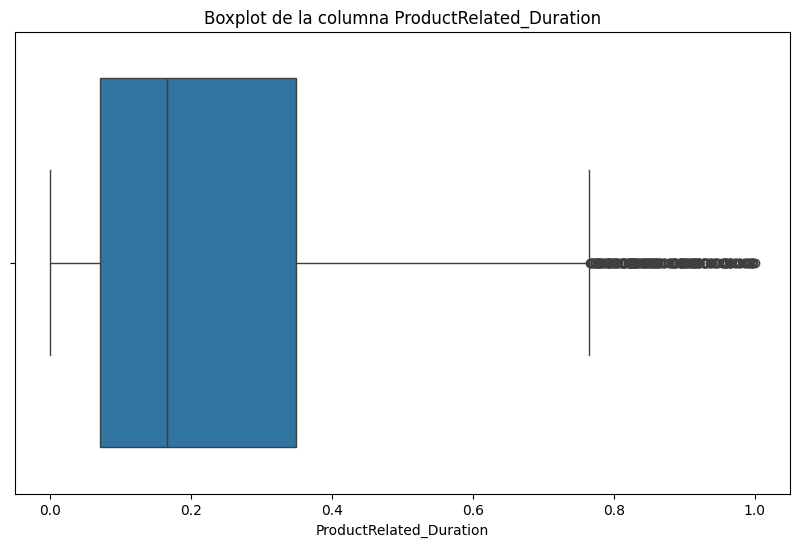

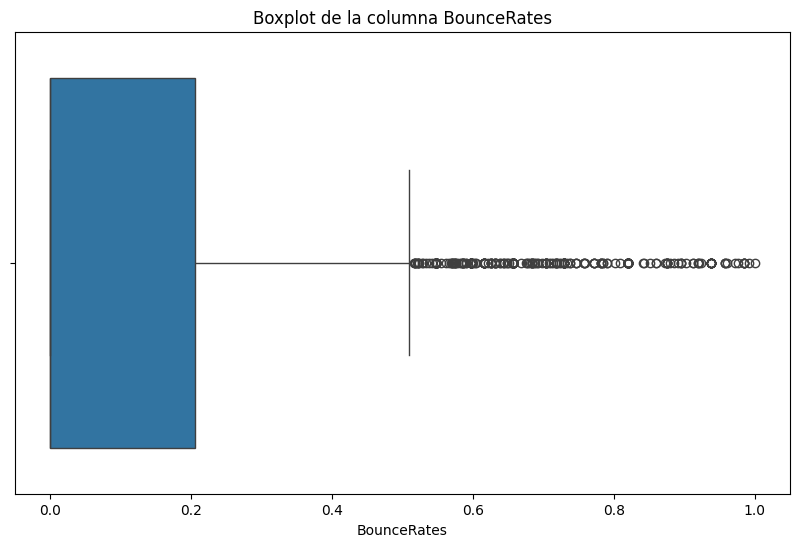

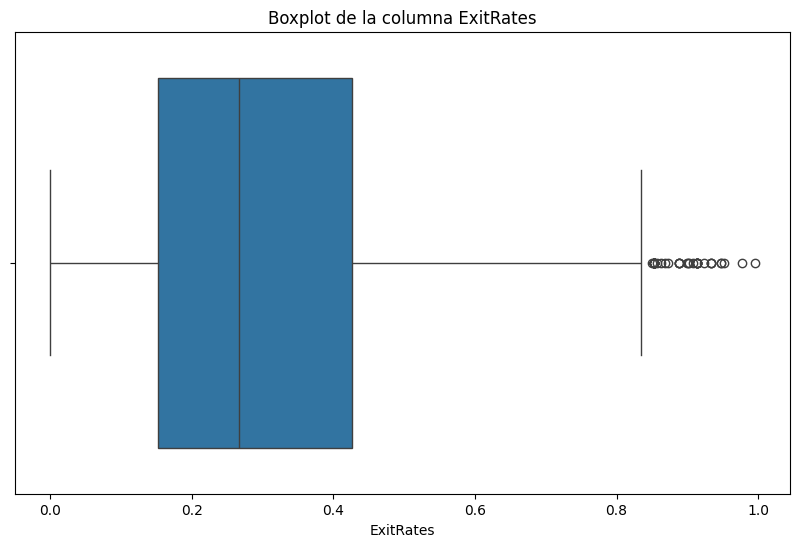

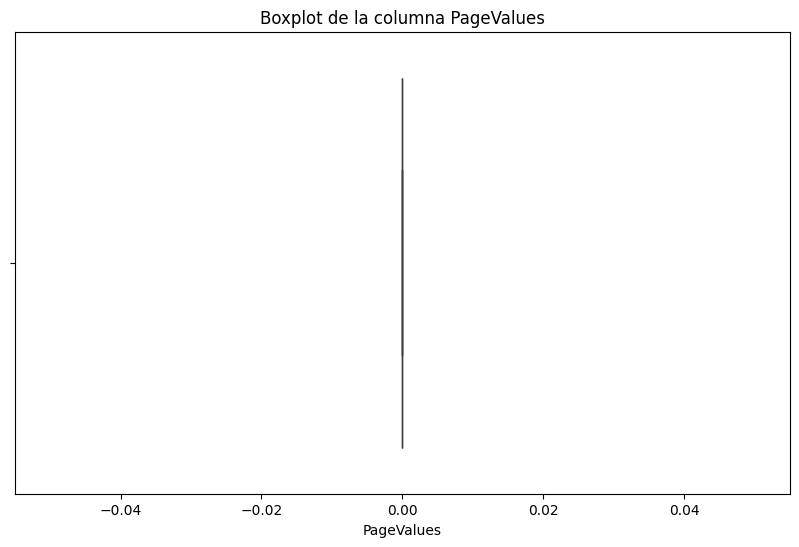

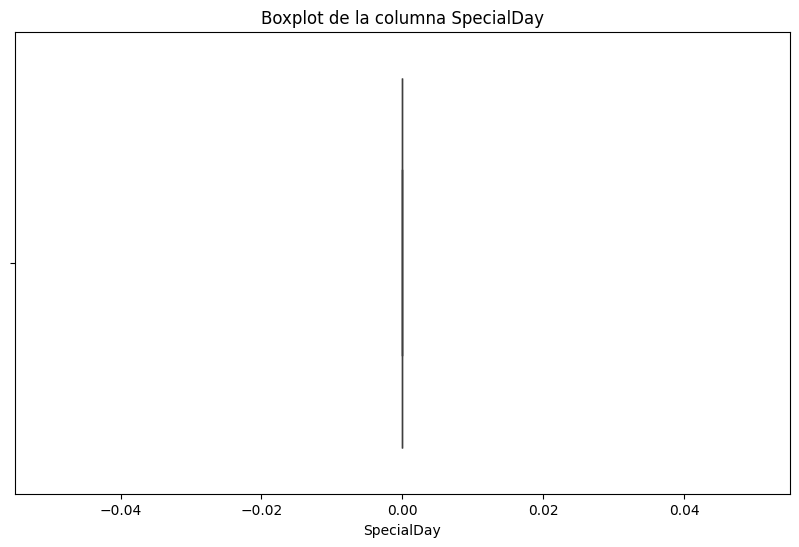

<class 'pandas.core.frame.DataFrame'>
Index: 4148 entries, 4 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 4148 non-null   int64  
 1   Administrative_Duration        4148 non-null   float64
 2   Informational                  4148 non-null   int64  
 3   Informational_Duration         4148 non-null   float64
 4   ProductRelated                 4148 non-null   int64  
 5   ProductRelated_Duration        4148 non-null   float64
 6   BounceRates                    4148 non-null   float64
 7   ExitRates                      4148 non-null   float64
 8   PageValues                     4148 non-null   float64
 9   SpecialDay                     4148 non-null   float64
 10  OperatingSystems               4148 non-null   int64  
 11  Browser                        4148 non-null   int64  
 12  Region                         4148 non-null   int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Función para manejar valores atípicos usando IQR
#def remove_outliers_iqr(df, column):
#    Q1 = df[column].quantile(0.25)
#    Q3 = df[column].quantile(0.75)
#    IQR = Q3 - Q1
#    lower_bound = Q1 - 1.5 * IQR
#    upper_bound = Q3 + 1.5 * IQR
#    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
#    return df

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Visualizar los datos antes de eliminar los valores atípicos
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title("Boxplot de la columna {}".format(column))
    plt.show()

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Columnas numéricas en las que aplicaremos el método IQR
numeric_columns = [
    'Administrative_Duration', 'Informational_Duration',
    'ProductRelated_Duration', 'BounceRates',
    'ExitRates', 'PageValues', 'SpecialDay'
]

# Aplicar el manejo de valores atípicos
for column in numeric_columns:
    data_encoded = remove_outliers_iqr(data_encoded, column)

# Normalización de datos numéricos usando MinMaxScaler
scaler = MinMaxScaler()
data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

# Mostrar las primeras filas del dataset limpio
data_encoded.head()
data_encoded.info()


In [ ]:
import mlflow
import mlflow.sklearn
import pandas as pd
#from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.drop('Revenue',axis=1)
y = df['Revenue']

# Configurar el servidor de seguimiento de MLflow con ngrok
ngrok_url = "https://eafd-34-148-147-183.ngrok-free.app"
mlflow.set_tracking_uri(ngrok_url)

# Iniciar una corrida de MLflow
with mlflow.start_run():
    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Registra los datos en MLflow
    mlflow.log_param("data_features_shape", X.shape)
    mlflow.log_param("data_targets_shape", y.shape)

    # Registrar los parámetros del experimento
    n_estimators = 100
    max_depth = 5
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)

    # Entrenar el modelo
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Predecir y calcular precisión
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Registrar la métrica
    mlflow.log_metric("accuracy", accuracy)

    # Guardar el modelo
    #mlflow.sklearn.log_model(model, "RandomForest")

     # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="sklearn-model",
        #signature=signature,
        registered_model_name="sk-learn-random-forest-reg-model",
    )

# Finalizar la corrida de MLflow
mlflow.end_run()

Successfully registered model 'sk-learn-random-forest-reg-model'.
2024/06/14 22:36:06 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-random-forest-reg-model, version 1
Created version '1' of model 'sk-learn-random-forest-reg-model'.
